In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv("../data/listings.csv")

In [49]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,97.0,2,708,9/2/2025,3.52,1,328,25,NaN
1,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,160.0,3,339,8/20/2025,1.98,1,316,14,NaN
2,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,38.0,4,54,5/5/2025,0.28,1,88,1,NaN
3,13035,Historic house in highly walkable East Austin,50793,Margaret Ann,NaN,78702,30.26098,-97.73072,Entire home/apt,145.0,15,19,7/31/2025,0.11,2,321,1,NaN
4,22828,Garage Apartment central SE Austin,56488,David,NaN,78741,30.23614,-97.73225,Entire home/apt,58.0,30,56,8/16/2025,0.30,1,211,3,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10533 non-null  int64  
 1   name                            10533 non-null  object 
 2   host_id                         10533 non-null  int64  
 3   host_name                       10524 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10533 non-null  int64  
 6   latitude                        10533 non-null  float64
 7   longitude                       10533 non-null  float64
 8   room_type                       10533 non-null  object 
 9   price                           10517 non-null  float64
 10  minimum_nights                  10533 non-null  int64  
 11  number_of_reviews               10533 non-null  int64  
 12  last_review                     

In [51]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.053300e+04,1.053300e+04,0.0,10533.000000,10533.000000,10533.000000,10517.000000,10533.000000,10533.000000,8909.000000,10533.000000,10533.000000,10533.000000,0.0
mean,7.673744e+17,2.051309e+08,NaN,78724.782683,30.281656,-97.749225,414.537701,7.768157,55.858920,1.742838,9.856736,234.909238,13.065698,NaN
std,5.572353e+17,2.125070e+08,NaN,20.868113,0.065631,0.064934,2896.807897,20.586238,104.276866,1.809563,17.808890,114.102467,18.844388,NaN
min,5.456000e+03,2.300000e+01,NaN,78701.000000,30.078440,-98.053350,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,5.060361e+07,2.192214e+07,NaN,78704.000000,30.242391,-97.767457,86.000000,1.000000,2.000000,0.430000,1.000000,143.000000,1.000000,NaN
50%,8.952778e+17,1.091668e+08,NaN,78723.000000,30.269836,-97.739867,135.000000,2.000000,17.000000,1.230000,2.000000,263.000000,5.000000,NaN
75%,1.260918e+18,3.972112e+08,NaN,78745.000000,30.313840,-97.715320,226.000000,3.000000,62.000000,2.510000,9.000000,339.000000,19.000000,NaN
max,1.510543e+18,7.181423e+08,NaN,78759.000000,30.519400,-97.562440,50000.000000,365.000000,1305.000000,41.140000,96.000000,365.000000,396.000000,NaN


In [52]:
# What characteristics usually influence Airbnb nightly prices, and how accurately can we predict the price using available listing data?

In [53]:
df['price'] = df['price'].astype(float)


In [54]:
df['price'].describe()

count    10517.000000
mean       414.537701
std       2896.807897
min          8.000000
25%         86.000000
50%        135.000000
75%        226.000000
max      50000.000000
Name: price, dtype: float64

In [55]:
# remove luxury airbnb models

In [56]:
df = df[df['price'] < 500]

In [57]:
features = [
    'latitude',
    'longitude',
    'room_type',
    'minimum_nights',
    'availability_365',
    'reviews_per_month',
    'number_of_reviews_ltm',
    'calculated_host_listings_count'
]


In [58]:
df_model = df[features + ['price']].dropna()

In [59]:
df_model = pd.get_dummies(df_model, drop_first=True)

from sklearn.model_selection import train_test_split

X = df_model.drop('price', axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)
mae = mean_absolute_error(y_test, preds)

mae


64.08225802612476

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mae


53.50957047791893

In [62]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


latitude                          0.184105
longitude                         0.174299
reviews_per_month                 0.171051
availability_365                  0.139220
calculated_host_listings_count    0.086484
room_type_Private room            0.081491
number_of_reviews_ltm             0.079498
minimum_nights                    0.073853
room_type_Shared room             0.009420
room_type_Hotel room              0.000578
dtype: float64

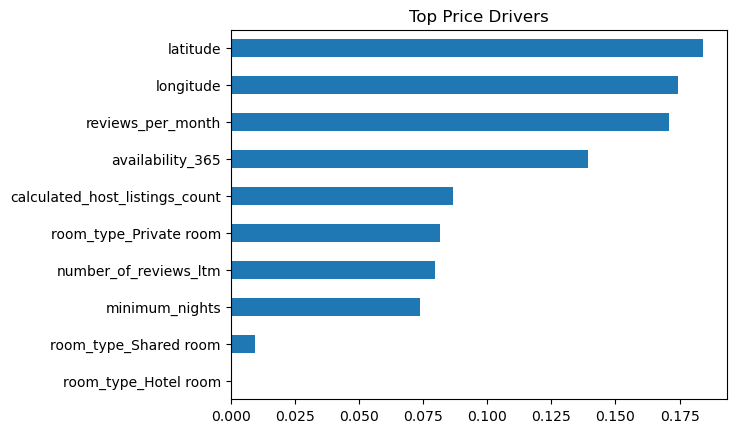

In [63]:
importances.head(10).plot(kind='barh')
plt.title("Top Price Drivers")
plt.gca().invert_yaxis()
plt.show()


In [45]:
# Key Findings

#- Location is the strongest driver of Airbnb pricing, with geographic coordinates consistently ranking as the most influential features.
# - Recent demand indicators, such as reviews per month, are more predictive of price than cumulative review counts.
# - Host pricing strategy, captured through availability and minimum night requirements, meaningfully impacts nightly rates.
#- Room type influences price but plays a secondary role compared to location and demand signals.


In [47]:
#Business Implications
- Airbnb pricing tools should prioritize location when reccomending nightly rates to hosts
- Hosts that are seeking to increase revenue may benefit from optimizing availility and minimum stay requirements rather than focusing on accumulating reviews
- Recent demand appears to be more valuable than overall popularity, suggesting that pricing models should weigh recent activity more heavily. 

SyntaxError: invalid syntax (2317870711.py, line 2)